# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# Data frame
df = pd.DataFrame(columns = ["City", "Cloudiness", "Country", "Date", "Humidity", 
                             "Latitude", "Longitude", "Max Temp", "Wind Speed"])

# List for holding lat_lngs and cities and countries
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city/country is unique, then add it to a our cities/countries list
    if city not in cities:
        cities.append(city)
        
# Add city and country list to data frame
df["City"] = pd.Series(cities)

# Print the city count to confirm sufficient count
print(len(df))
print(df)

634
                City Cloudiness Country Date Humidity Latitude Longitude  \
0           benghazi        NaN     NaN  NaN      NaN      NaN       NaN   
1       punta arenas        NaN     NaN  NaN      NaN      NaN       NaN   
2             ormara        NaN     NaN  NaN      NaN      NaN       NaN   
3          byron bay        NaN     NaN  NaN      NaN      NaN       NaN   
4            salalah        NaN     NaN  NaN      NaN      NaN       NaN   
5            mataura        NaN     NaN  NaN      NaN      NaN       NaN   
6             atuona        NaN     NaN  NaN      NaN      NaN       NaN   
7             bonthe        NaN     NaN  NaN      NaN      NaN       NaN   
8        clyde river        NaN     NaN  NaN      NaN      NaN       NaN   
9             hobart        NaN     NaN  NaN      NaN      NaN       NaN   
10             bluff        NaN     NaN  NaN      NaN      NaN       NaN   
11            zaysan        NaN     NaN  NaN      NaN      NaN       NaN   
12      

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [22]:
# Query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
params = {"appid": api_key, "units": units}
query_url = f"{url}appid={params['appid']}&units={params['units']}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=3d5a23b4c50d392abf434a60e94a14c5&units=imperial&q=


In [23]:
# Going through cities to get data
count = 1
print(f"Beginning Data Retrieval")
print(f"------------------------")

# Loop through data
for index, row in df.iterrows():
    try:
        # Get city and country
        query_city = row["City"]

        # JSON request
        weather_data = requests.get(query_url + query_city).json()
        print(f"Processing record {count} | {query_city}")
        count += 1
        
        # Apply data to data frame
        df.set_value(index, "Cloudiness", weather_data["clouds"]["all"])
        df.set_value(index, "Country", weather_data["sys"]["country"])
        df.set_value(index, "Date", weather_data["dt"])
        df.set_value(index, "Humidity", weather_data["main"]["humidity"])
        df.set_value(index, "Latitude", weather_data["coord"]["lat"])
        df.set_value(index, "Longitude", weather_data["coord"]["lon"])
        df.set_value(index, "Max Temp", weather_data["main"]["temp_max"])
        df.set_value(index, "Wind Speed", weather_data["wind"]["speed"])
        
        # Wait time before each loop
        time.sleep(1)
        
    except:
        pass

print(f"------------------------")
print(f"Data Retrieval Complete")
print(f"------------------------")

Beginning Data Retrieval
------------------------
Processing record 1 | benghazi


/Users/John/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/John/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/John/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/John/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/John/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors ins

Processing record 2 | punta arenas
Processing record 3 | ormara
Processing record 4 | byron bay
Processing record 5 | salalah
Processing record 6 | mataura
Processing record 7 | atuona
Processing record 8 | bonthe
Processing record 9 | clyde river
Processing record 10 | hobart
Processing record 11 | bluff
Processing record 12 | zaysan
Processing record 13 | ushuaia
Processing record 14 | la ronge
Processing record 15 | jardim
Processing record 16 | bathsheba
Processing record 17 | ponta do sol
Processing record 18 | yuancheng
Processing record 19 | bermejo
Processing record 20 | kawalu
Processing record 21 | bubaque
Processing record 22 | belushya guba
Processing record 23 | pevek
Processing record 24 | cape town
Processing record 25 | ust-ishim
Processing record 26 | nikolskoye
Processing record 27 | busselton
Processing record 28 | torbay
Processing record 29 | atar
Processing record 30 | aklavik
Processing record 31 | castro
Processing record 32 | butaritari
Processing record 33 | a

Processing record 251 | saint-michel-des-saints
Processing record 252 | pouembout
Processing record 253 | pacific grove
Processing record 254 | siderno
Processing record 255 | mendahara
Processing record 256 | lae
Processing record 257 | ostashkov
Processing record 258 | kamenskoye
Processing record 259 | aguascalientes
Processing record 260 | chernushka
Processing record 261 | souillac
Processing record 262 | petropavlovsk-kamchatskiy
Processing record 263 | longyan
Processing record 264 | te anau
Processing record 265 | wattegama
Processing record 266 | stephenville
Processing record 267 | krasnoselkup
Processing record 268 | belaya gora
Processing record 269 | brasilia de minas
Processing record 270 | port augusta
Processing record 271 | iisalmi
Processing record 272 | canora
Processing record 273 | yarkovo
Processing record 274 | ulaanbaatar
Processing record 275 | bambous virieux
Processing record 276 | san borja
Processing record 277 | merauke
Processing record 278 | provideniya


Processing record 495 | soe
Processing record 496 | scottsbluff
Processing record 497 | kavaratti
Processing record 498 | slave lake
Processing record 499 | temir
Processing record 500 | maracas
Processing record 501 | barbar
Processing record 502 | margate
Processing record 503 | praia da vitoria
Processing record 504 | victoria
Processing record 505 | bangassou
Processing record 506 | cockburn town
Processing record 507 | havoysund
Processing record 508 | mwinilunga
Processing record 509 | lazarev
Processing record 510 | beausejour
Processing record 511 | batemans bay
Processing record 512 | bani
Processing record 513 | ijaki
Processing record 514 | paradwip
Processing record 515 | nguiu
Processing record 516 | oyek
Processing record 517 | sehithwa
Processing record 518 | andra
Processing record 519 | ko samui
Processing record 520 | xiaoweizhai
Processing record 521 | hammerfest
Processing record 522 | palu
Processing record 523 | oriximina
Processing record 524 | lewisporte
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
df = df.dropna()

(560, 9)

In [58]:
df.to_csv("weather_info.csv")
df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Latitude      560
Longitude     560
Max Temp      560
Wind Speed    560
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

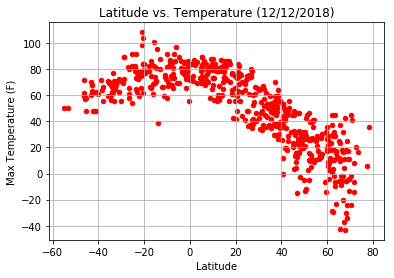

In [54]:
df["Latitude"] = df.Latitude.astype(float)
df["Max Temp"] = df["Max Temp"].astype(float)
temp_lat = df.plot(kind="scatter", x="Latitude", y="Max Temp", color="red", grid=True)
plt.title("Latitude vs. Temperature (12/12/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Latitude_Temperature.png", bbox_inches="tight")

#### Latitude vs. Humidity Plot

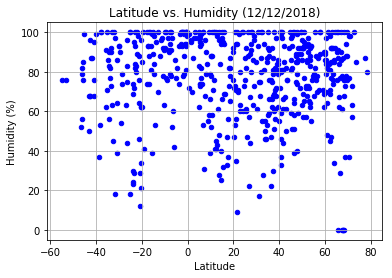

In [55]:
df["Humidity"] = df.Humidity.astype(float)
humid_lat = df.plot(kind="scatter", x="Latitude", y="Humidity", color="blue", grid=True)
plt.title("Latitude vs. Humidity (12/12/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Latitude_Humidity.png", bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

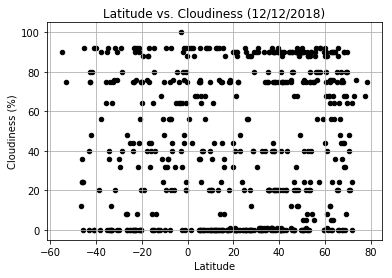

In [56]:
df["Cloudiness"] = df.Cloudiness.astype(float)
cloud_lat = df.plot(kind="scatter", x="Latitude", y="Cloudiness", color="black", grid=True)
plt.title("Latitude vs. Cloudiness (12/12/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Latitude_Cloudiness.png", bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

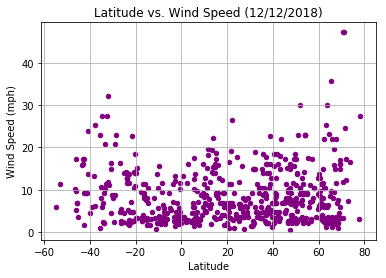

In [57]:
df["Wind Speed"] = df["Wind Speed"].astype(float)
wind_lat = df.plot(kind="scatter", x="Latitude", y="Wind Speed", color="purple", grid=True)
plt.title("Latitude vs. Wind Speed (12/12/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Latitude_WindSpeed.png", bbox_inches="tight")